<a href="https://colab.research.google.com/github/vovan3757/-/blob/main/M5L3_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные функции NLTK

## Импорт библиотек

In [ ]:
!pip install wordcloud
!pip install pymorphy2
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from matplotlib import pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 41.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=f6329516f864f091deca1e8da491c645bf5c271fbc76a8678e7acdec04957223
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text ='''
      У лукоморья дуб зелёный;
      Златая цепь на дубе том.
      И днём и ночью кот учёный
      Всё ходит по цепи кругом.
      Идёт направо — песнь заводит,
      Налево — сказку говорит.
      Там чудеса: там леший бродит,
      Русалка на ветвях сидит.
      Там на неведомых дорожках
      Следы невиданных зверей.
      Избушка там на курьих ножках
      Стоит без окон, без дверей.
      Там лес и дол видений полны.
      Там о заре прихлынут волны
      На брег песчаный и пустой,
      И тридцать витязей прекрасных
      Чредой из вод выходят ясных,
      И с ними дядька их морской.
      Там королевич мимоходом
      Пленяет грозного царя.
      Там в облаках перед народом
      Через леса, через моря
      Колдун несёт богатыря.
      В темнице там царевна тужит,
      А бурый волк ей верно служит.
      Там ступа с Бабою Ягой
      Идёт, бредёт сама собой,
      Там царь Кащей над златом чахнет;
      Там русский дух… там Русью пахнет!
      И там я был, и мёд я пил;
      У моря видел дуб зелёный;
      Под ним сидел, и кот учёный
      Свои мне сказки говорил.
          '''

## Разбиваем текст на предложения

In [ ]:
sentences = sent_tokenize(text, language='russian')

print(20 * "-")
print(sentences)
print(20 * "-")
print("Всего предложений: ", len(sentences))

--------------------
['\n      У лукоморья дуб зелёный;\n      Златая цепь на дубе том.', 'И днём и ночью кот учёный\n      Всё ходит по цепи кругом.', 'Идёт направо — песнь заводит,\n      Налево — сказку говорит.', 'Там чудеса: там леший бродит,\n      Русалка на ветвях сидит.', 'Там на неведомых дорожках\n      Следы невиданных зверей.', 'Избушка там на курьих ножках\n      Стоит без окон, без дверей.', 'Там лес и дол видений полны.', 'Там о заре прихлынут волны\n      На брег песчаный и пустой,\n      И тридцать витязей прекрасных\n      Чредой из вод выходят ясных,\n      И с ними дядька их морской.', 'Там королевич мимоходом\n      Пленяет грозного царя.', 'Там в облаках перед народом\n      Через леса, через моря\n      Колдун несёт богатыря.', 'В темнице там царевна тужит,\n      А бурый волк ей верно служит.', 'Там ступа с Бабою Ягой\n      Идёт, бредёт сама собой,\n      Там царь Кащей над златом чахнет;\n      Там русский дух… там Русью пахнет!', 'И там я был, и мёд я пил;\n

## Удаляем стоп-слова

In [ ]:
stop_words = set(stopwords.words('russian'))

print(10 * "-", " Стоп-слова ", 10 * "-")
print(stop_words)
print(20 * "-")

----------  Стоп-слова  ----------
{'один', 'про', 'зачем', 'под', 'всех', 'чуть', 'ж', 'от', 'этой', 'о', 'уже', 'или', 'были', 'мы', 'раз', 'сейчас', 'меня', 'да', 'с', 'он', 'то', 'почти', 'будет', 'эту', 'им', 'опять', 'между', 'нельзя', 'потому', 'ним', 'об', 'у', 'кто', 'так', 'уж', 'не', 'если', 'впрочем', 'себя', 'через', 'наконец', 'этот', 'без', 'тем', 'тебя', 'и', 'вас', 'три', 'ему', 'эти', 'чтоб', 'ни', 'чтобы', 'лучше', 'такой', 'них', 'за', 'какая', 'сам', 'теперь', 'я', 'мой', 'будто', 'иногда', 'него', 'здесь', 'для', 'в', 'его', 'этом', 'себе', 'более', 'никогда', 'мне', 'как', 'перед', 'было', 'потом', 'из', 'том', 'конечно', 'всегда', 'они', 'ли', 'но', 'надо', 'при', 'нибудь', 'можно', 'больше', 'нас', 'по', 'к', 'там', 'этого', 'была', 'ну', 'того', 'где', 'со', 'ней', 'а', 'еще', 'два', 'что', 'над', 'есть', 'куда', 'вот', 'свою', 'даже', 'другой', 'бы', 'она', 'много', 'всего', 'тот', 'быть', 'нет', 'после', 'был', 'же', 'вы', 'разве', 'ничего', 'когда', 'тогда'

--------------------
['У', 'лукоморья', 'дуб', 'зелёный', ';', 'Златая', 'цепь', 'на', 'дубе', 'том', '.', 'И', 'днём', 'и', 'ночью', 'кот', 'учёный', 'Всё', 'ходит', 'по', 'цепи', 'кругом', '.', 'Идёт', 'направо', '—', 'песнь', 'заводит', ',', 'Налево', '—', 'сказку', 'говорит', '.', 'Там', 'чудеса', ':', 'там', 'леший', 'бродит', ',', 'Русалка', 'на', 'ветвях', 'сидит', '.', 'Там', 'на', 'неведомых', 'дорожках', 'Следы', 'невиданных', 'зверей', '.', 'Избушка', 'там', 'на', 'курьих', 'ножках', 'Стоит', 'без', 'окон', ',', 'без', 'дверей', '.', 'Там', 'лес', 'и', 'дол', 'видений', 'полны', '.', 'Там', 'о', 'заре', 'прихлынут', 'волны', 'На', 'брег', 'песчаный', 'и', 'пустой', ',', 'И', 'тридцать', 'витязей', 'прекрасных', 'Чредой', 'из', 'вод', 'выходят', 'ясных', ',', 'И', 'с', 'ними', 'дядька', 'их', 'морской', '.', 'Там', 'королевич', 'мимоходом', 'Пленяет', 'грозного', 'царя', '.', 'Там', 'в', 'облаках', 'перед', 'народом', 'Через', 'леса', ',', 'через', 'моря', 'Колдун', 'несёт', 

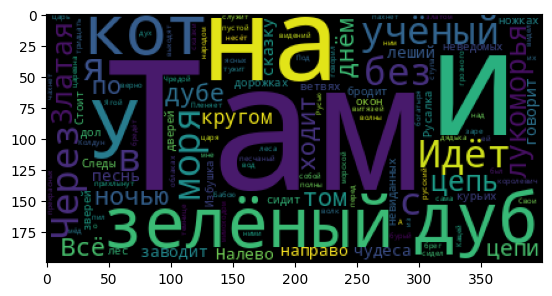

In [ ]:
words = word_tokenize(text)

print( 20 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

----------  Слова в нижнем регистре без стоп-слов  ----------
['лукоморья', 'дуб', 'зелёный', 'златая', 'цепь', 'дубе', 'днём', 'ночью', 'кот', 'учёный', 'всё', 'ходит', 'цепи', 'кругом', 'идёт', 'направо', 'песнь', 'заводит', 'налево', 'сказку', 'говорит', 'чудеса', 'леший', 'бродит', 'русалка', 'ветвях', 'сидит', 'неведомых', 'дорожках', 'следы', 'невиданных', 'зверей', 'избушка', 'курьих', 'ножках', 'стоит', 'окон', 'дверей', 'лес', 'дол', 'видений', 'полны', 'заре', 'прихлынут', 'волны', 'брег', 'песчаный', 'пустой', 'тридцать', 'витязей', 'прекрасных', 'чредой', 'вод', 'выходят', 'ясных', 'ними', 'дядька', 'морской', 'королевич', 'мимоходом', 'пленяет', 'грозного', 'царя', 'облаках', 'народом', 'леса', 'моря', 'колдун', 'несёт', 'богатыря', 'темнице', 'царевна', 'тужит', 'бурый', 'волк', 'верно', 'служит', 'ступа', 'бабою', 'ягой', 'идёт', 'бредёт', 'сама', 'собой', 'царь', 'кащей', 'златом', 'чахнет', 'русский', 'русью', 'пахнет', 'мёд', 'пил', 'моря', 'видел', 'дуб', 'зелёный', 

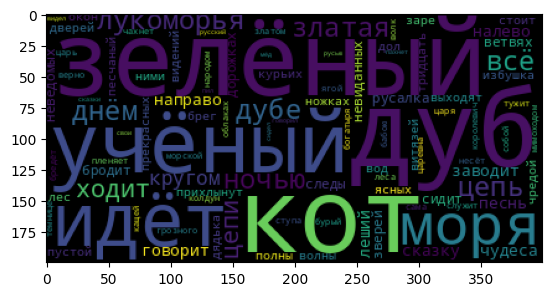

In [ ]:
words = [word.lower() for word in words if word.isalpha()]
words = [word for word in words if word not in stop_words]

print(10 * "-", " Слова в нижнем регистре без стоп-слов ", 10 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Лемматизация

----------  Слова в начальной форме  ----------
['лукоморье', 'дуб', 'зелёный', 'златой', 'цепь', 'дуб', 'день', 'ночью', 'кот', 'учёный', 'всё', 'ходить', 'цепь', 'кругом', 'идти', 'направо', 'песня', 'заводить', 'налево', 'сказка', 'говорить', 'чудо', 'леший', 'бродить', 'русалка', 'ветвь', 'сидеть', 'неведомый', 'дорожка', 'след', 'невиданный', 'зверь', 'избушка', 'курий', 'ножка', 'стоить', 'окно', 'дверь', 'лес', 'дол', 'видение', 'полный', 'заря', 'прихлынуть', 'волна', 'брег', 'песчаный', 'пустой', 'тридцать', 'витязь', 'прекрасный', 'чреда', 'вода', 'выходить', 'ясный', 'они', 'дядька', 'морской', 'королевич', 'мимоходом', 'пленять', 'грозный', 'царь', 'облако', 'народ', 'лес', 'море', 'колдун', 'нести', 'богатырь', 'темница', 'царевна', 'тужить', 'бурый', 'волк', 'верно', 'служить', 'ступа', 'баба', 'яга', 'идти', 'брести', 'сам', 'себя', 'царь', 'кащи', 'злато', 'чахнуть', 'русский', 'русь', 'пахнуть', 'мёд', 'пить', 'море', 'видеть', 'дуб', 'зелёный', 'сидеть', 'кот', 'учёны

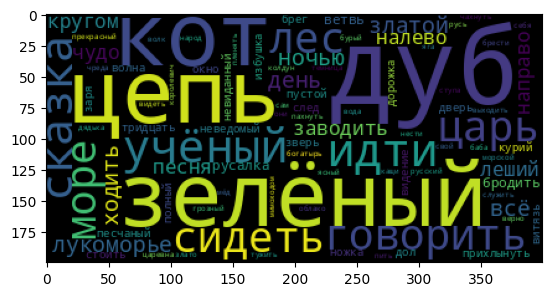

In [ ]:
morph = pymorphy2.MorphAnalyzer()
words = [morph.parse(word)[0].normal_form for word in words]

print(10 * "-", " Слова в начальной форме ", 10 * "-")
print(words)
print(20 * "-")
print("Всего слов в вашем тексте: ", len(words))
print(20 * "-")

wc = WordCloud().generate(' '.join([i for i in words]))
plt.imshow(wc)

## Вычисляем частотность каждого предложения

In [ ]:
freq_dist = FreqDist(words)
sentence_scores = {}

for i, sentence in enumerate(sentences):
    sentence_words = word_tokenize(sentence.lower())
    morph = pymorphy2.MorphAnalyzer()
    sentence_words = [morph.parse(word)[0].normal_form for word in sentence_words]
    sentence_score = sum([freq_dist[word] for word in sentence_words if word in freq_dist])

    sentence_scores[i] = sentence_score

sentence_scores


{0: 12,
 1: 11,
 2: 10,
 3: 7,
 4: 5,
 5: 6,
 6: 5,
 7: 17,
 8: 6,
 9: 9,
 10: 7,
 11: 16,
 12: 22}

## Сортируем предложения по частотности

In [ ]:
sorted_scores = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

sorted_scores

[(12, 22),
 (7, 17),
 (11, 16),
 (0, 12),
 (1, 11),
 (2, 10),
 (9, 9),
 (3, 7),
 (10, 7),
 (5, 6),
 (8, 6),
 (4, 5),
 (6, 5)]

## Формируем суммаризацию

In [ ]:
selected_sentences = sorted_scores[:1]
selected_sentences = sorted(selected_sentences)

# Формируем суммаризацию
summary = ' '.join([sentences[i] for i, _ in selected_sentences])
print(summary)

И там я был, и мёд я пил;
      У моря видел дуб зелёный;
      Под ним сидел, и кот учёный
      Свои мне сказки говорил.
